<div style="border:2px solid #422e13; border-radius:30px;  background:#fhffff;">
    <div style="padding:10px 10px 10px 0px; margin:5px; border-radius:23px; background : #20B2AA ; text-align:center;">
        <span style="font-family:sans-serif; font-size:40px; color:#fff;">Working with unbalanced datasets by using oversampling methods ✅️</span>
    </div>
</div>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#20B2AA;font-family:sans-serif;color:#FFF9ED;font-size:200%;text-align:center;border-radius:15px 15px;">TABLE OF CONTENTS</p>   
    
* [1. INTRODUCTION](#1)
    
* [2. IMPORT NECESSARY LIBRARIES](#2)
    
* [3. LOAD THE DATASET](#3)
    
* [4. INITIAL INFORMATION ABOUT DATASET](#4)
    
    * [4.1. Change column names](#4.1)    
    * [4.2. Basic information about dataset](#4.2)    
    * [4.3. Check null values](#4.3)    
    * [4.4. Descriptive statistics of numeric variables](#4.4)    
    
    
    
* [5. DATA VISUALIZATION](#5)
    
    * [5.1. Heatmap](#5.1)    
    * [5.2. Pie Chart](#5.2)    
    * [5.3. Barplot](#5.3)    
    * [5.4. Catplot](#5.4)
    * [5.5. Pairplot](#5.5)
    * [5.6. Scatterplot](#5.6)
    * [5.7. Distplot](#5.7)
    * [5.8. Regplot](#5.8)
        
    
* [6. DATASET PREPROCESSİNG](#6)
    
    * [6.1. Load plot_confusion_matrix function](#6.1)    
    * [6.2. Load scoring function](#6.2)    
    * [6.3. Load pca_plot function](#6.3)    
    * [6.4. Look at dataset again](#6.4)
    * [6.5. Encode categoric variables](#6.5)
    * [6.6. Select dependent and independent variables](#6.6)
    * [6.7. Split the dataset into train and test sets](#6.7)
    * [6.8. Standardization process](#6.8)

    
    
* [7. OVERSAMPLING METHODS](#7)
    
    * [7.1. Logistic regression model without oversampling](#7.1)    
    * [7.2. Random oversampling](#7.2)    
    * [7.3. SMOTE oversampling](#7.3)    
    * [7.4. Borderline SMOTE oversampling](#7.4)
    * [7.5. Borderline SMOTE SVM](#7.5)
    * [7.6. Adaptive synthetic sampling](#7.6)
    * [7.7. Compare all results in a table](#7.7)
    * [7.8. Main reference for the notebook](#7.8)
    * [7.9. Author's message](#7.9)

<a id="1"></a>

## <b>1 <span style='color:#422e13;font-family:cursive;'>|</span> INTRODUCTION</b>

<div style="border:1px solid blue; border-radius:10px; padding:2px">
    <img src="https://cdn-images-1.medium.com/max/1000/1*ZeGXHtNu8fu_PswjHivGwg.jpeg" width="100%">
</div>
<div style="padding:4px">
    
### <span style='background:yellow;color:#000000;'>What is unbalanced data?</span>

    
**Unbalanced datasets are prevalent in a multitude of fields and sectors, and of course, this includes financial services. From fraud to non-performing loans, data scientists come across them in many contexts. The challenge appears when machine learning algorithms try to identify these rare cases in rather big datasets. Due to the disparity of classes in the variables, the algorithm tends to categorize into the class with more instances, the majority class, while at the same time giving the false sense of a highly accurate model. Both the inability to predict rare events, the minority class, and the misleading accuracy detracts from the predictive models we build. In simple terms, an unbalanced dataset is one in which the target variable has more observations in one specific class than the others. For example, let’s suppose that we have a dataset used to detect a fraudulent transaction. If we have a binary target variable (2 classes) — that’s 1 when the transaction is fraudulent and 0 when it isn’t — it’s normal for less than 1% of the observations to belong to class 1 (fraud) than to class 0 (not fraud). In this case, we have a highly unbalanced dataset.**

**Here the problem is that models trained on unbalanced datasets often have poor results when they have to generalize (predict a class or classify unseen observations). Despite the algorithm you choose, some models will be more susceptible to unbalanced data than others. Ultimately, this means you will not end up with a good model, and the reasons include:**

**<mark>The algorithm receives significantly more examples from one class, prompting it to be biased towards that particular class. It does not learn what makes the other class “different” and fails to understand the underlying patterns that allow us to distinguish classes.</mark>**

**The algorithm learns that a given class is more common, making it “natural” for there to be a greater tendency towards it. The algorithm is then prone to overfitting the majority class. Just by predicting the majority class, models would score high on their loss-functions.**
    
    
![](https://miro.medium.com/max/1400/1*miAWYUJ7sgWaRHCZMdP2OQ.png)

<div style="border-radius:10px;
            border : black solid; font-family:sans-serif;
            background-color:#20B2AA;
            font-size:120%;
            text-align: left">

<h3 style='; border:15; border-radius: 15px; font-weight: bold; color:white'><center>About the dataset we used</center></h3>  
    
<span style="color:#ffffff">This dataset is a collection of credit card cliets of a credit issuing company.</span>    
<span style="color:#ffffff">The goal is to determine clients will make default or not on the next month.</span>    

#### <span style="color:#ffffff">Target variable:</span> 
#### <span style="color:#ffffff">NO Default = 0, YES Default = 1</span>

<a id="2"></a>

## <b>2 <span style='color:#422e13; font-family:cursive;'>|</span> IMPORT NECESSARY LIBRARIES</b>

In [1]:
import pandas as pd   
import numpy as np   
import seaborn as sns  
import matplotlib.pyplot as plt  
from matplotlib import pyplot  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler  
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from numpy import where
from collections import Counter
from termcolor import colored

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

!pip install imbalanced-learn &> /dev/null
!pip install imblearn &> /dev/null
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
 
import warnings
warnings.filterwarnings("ignore")
 
pd.set_option('display.max_columns', 30)

print(colored("\nNECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))


NECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...


<a id="3"></a>

## <b>3 <span style='color:#422e13;font-family: cursive;'>|</span> LOAD THE DATASET</b>

In [2]:
df = pd.read_csv("../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")
df = df.drop("ID", axis = 1)
df.head(n = 7).style.set_properties(**{"background-color": "#20B2AA", "font-size" : "15px",
                                        "color": "#ffffff", "border": "1.5px solid black"})

<a id="4"></a>

## <b>4 <span style='color:#422e13'>|</span> INITIAL INFORMATION ABOUT DATASET</b>

<a id="4.1"></a>

#### <b>4.1 <span style='color:#422e13'>|</span> Change Column Names</b>

In [3]:
df.rename(columns = {"LIMIT_BAL" : "limit_bal", "SEX" : "sex", "EDUCATION" : "education", "MARRIAGE" : "marriage","AGE":"age",
                     "PAY_0":"pay_0", "PAY_2":"pay_2", "PAY_3":"pay_3", "PAY_4":"pay_4","PAY_5":"pay_5", "PAY_6":"pay_6","BILL_AMT1":"bill_amt_1", 
                     "BILL_AMT2":"bill_amt_2","BILL_AMT3":"bill_amt_3", "BILL_AMT4":"bill_amt_4", "BILL_AMT5":"bill_amt_5",
                     "BILL_AMT6":"bill_amt_6", "PAY_AMT1":"pay_amt_1", "PAY_AMT2":"pay_amt_2", "PAY_AMT3":"pay_amt_3", "PAY_AMT4":"pay_amt_4", 
                     "PAY_AMT5":"pay_amt_5", "PAY_AMT6":"pay_amt_6", "default.payment.next.month":"default"
                     },
          inplace = True)

print(colored("\nTHE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...", color = "green", attrs = ["bold", "dark"]))


THE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...


<a id="4.2"></a>

#### <b>4.2 <span style='color:#422e13'>|</span> Basic Information About Dataset</b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   limit_bal   30000 non-null  float64
 1   sex         30000 non-null  int64  
 2   education   30000 non-null  int64  
 3   marriage    30000 non-null  int64  
 4   age         30000 non-null  int64  
 5   pay_0       30000 non-null  int64  
 6   pay_2       30000 non-null  int64  
 7   pay_3       30000 non-null  int64  
 8   pay_4       30000 non-null  int64  
 9   pay_5       30000 non-null  int64  
 10  pay_6       30000 non-null  int64  
 11  bill_amt_1  30000 non-null  float64
 12  bill_amt_2  30000 non-null  float64
 13  bill_amt_3  30000 non-null  float64
 14  bill_amt_4  30000 non-null  float64
 15  bill_amt_5  30000 non-null  float64
 16  bill_amt_6  30000 non-null  float64
 17  pay_amt_1   30000 non-null  float64
 18  pay_amt_2   30000 non-null  float64
 19  pay_amt_3   30000 non-nul

In [5]:
df.shape

(30000, 24)

<a id="4.3"></a>

#### <b>4.3 <span style='color:#422e13'>|</span> Check null Values</b>

In [6]:
print("There are total {} null values in the dataset".format(df.isnull().sum().sum()))

There are total 0 null values in the dataset


<div style="border-radius:10px;
            border : black solid;
            background-color: #20B2AA; font-family:sans-serif;
            font-size:120%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:white'><center>Brief information</center></h4>  
    

<span style="color:#ffffff">Here we see that there are 25 (ID variable including) columns and 30000 rows in this dataset.</span>  <span style="color:#ffffff">Of the variables' data types, 13 are float and 11 are integer. Memory usage of this dataset: 5.5 MB. There is not any null value in dataset.</span> 

In [7]:
df['default'].value_counts(normalize = True)

0    0.7788
1    0.2212
Name: default, dtype: float64

<a id="4.4"></a>

#### <b>4.4 <span style='color:#422e13'>|</span> Descriptive statistics of numeric variables</b>

In [8]:
df.describe().style.set_properties(**{"background-color": "#20B2AA", "font-size" : "15px",
                                        "color": "#ffffff", "border": "1.5px solid black"})

<a id="5"></a>

## <b>5 <span style='color:#422e13'>|</span> DATA VISUALIZATION</b>

<a id="5.1"></a>

#### <b>5.1 <span style='color:#422e13'>|</span> Heatmap</b>

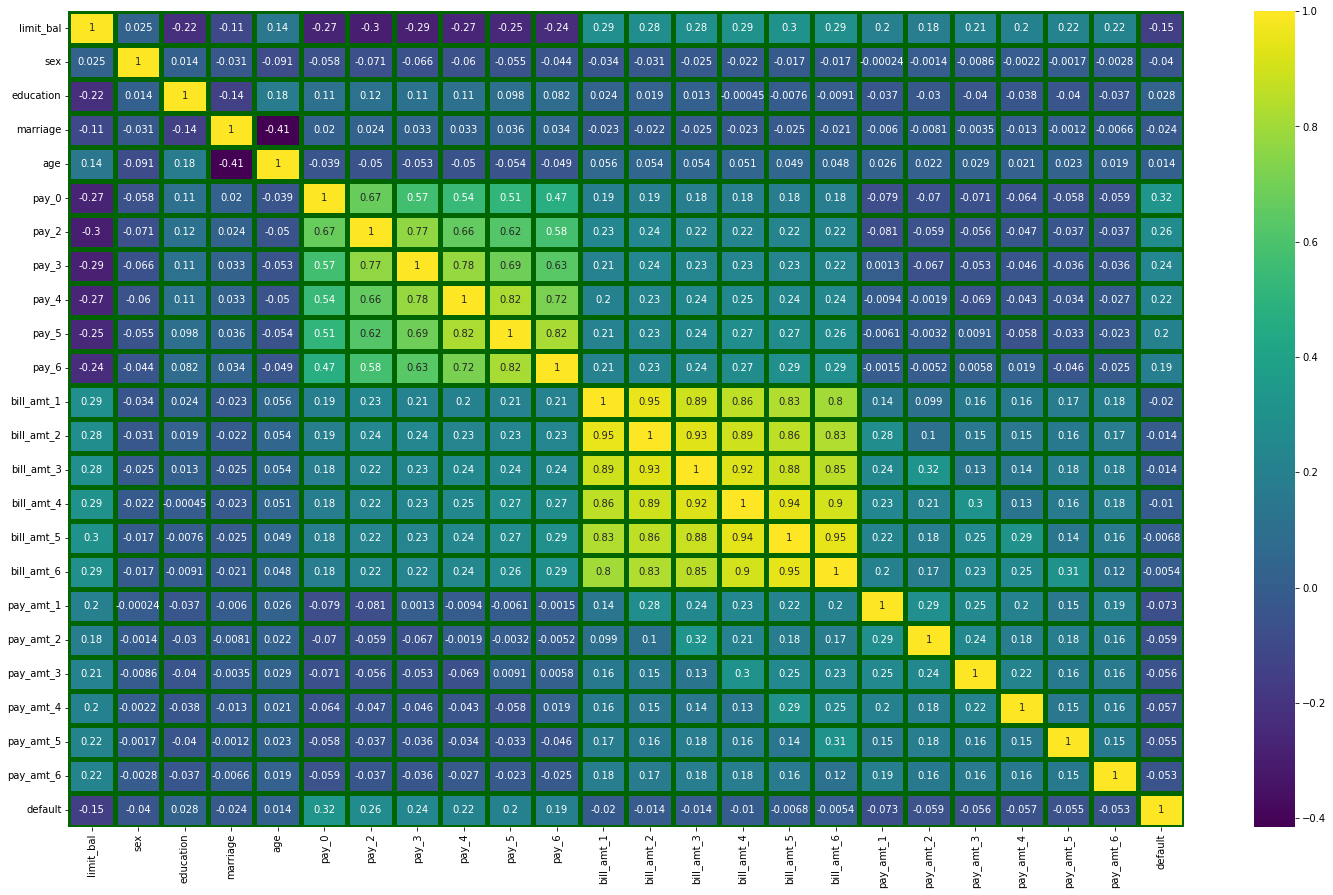

In [9]:
plt.figure(figsize = [25, 15], clear = True, facecolor = "white")
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "#006400", cmap = "viridis");

<a id="5.2"></a>

#### <b>5.2 <span style='color:#422e13'>|</span> Pie chart</b>

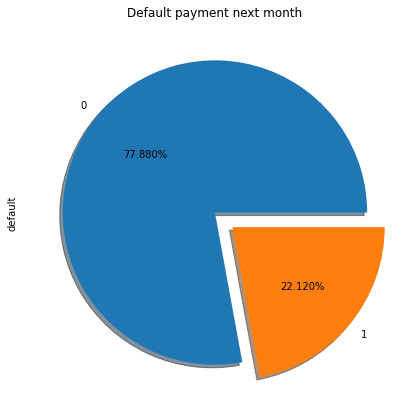

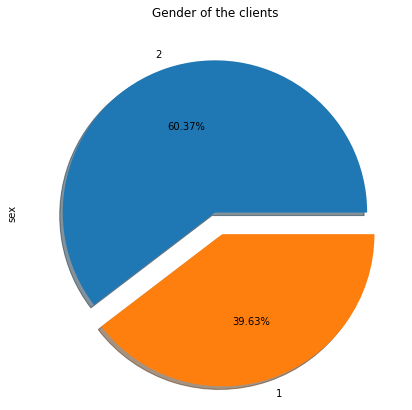

In [10]:
plt.figure(figsize = [20, 7], clear = True, facecolor = "#FFFFFF")
plt.title("Default payment next month")
df["default"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.3f%%', shadow = True);

plt.figure(figsize = [7, 7], clear = True, facecolor = "#FFFFFF")
plt.title("Gender of the clients")
df["sex"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.2f%%', shadow = True);

<a id="5.3"></a>

#### <b>5.3 <span style='color:#422e13'>|</span> Barplot</b>

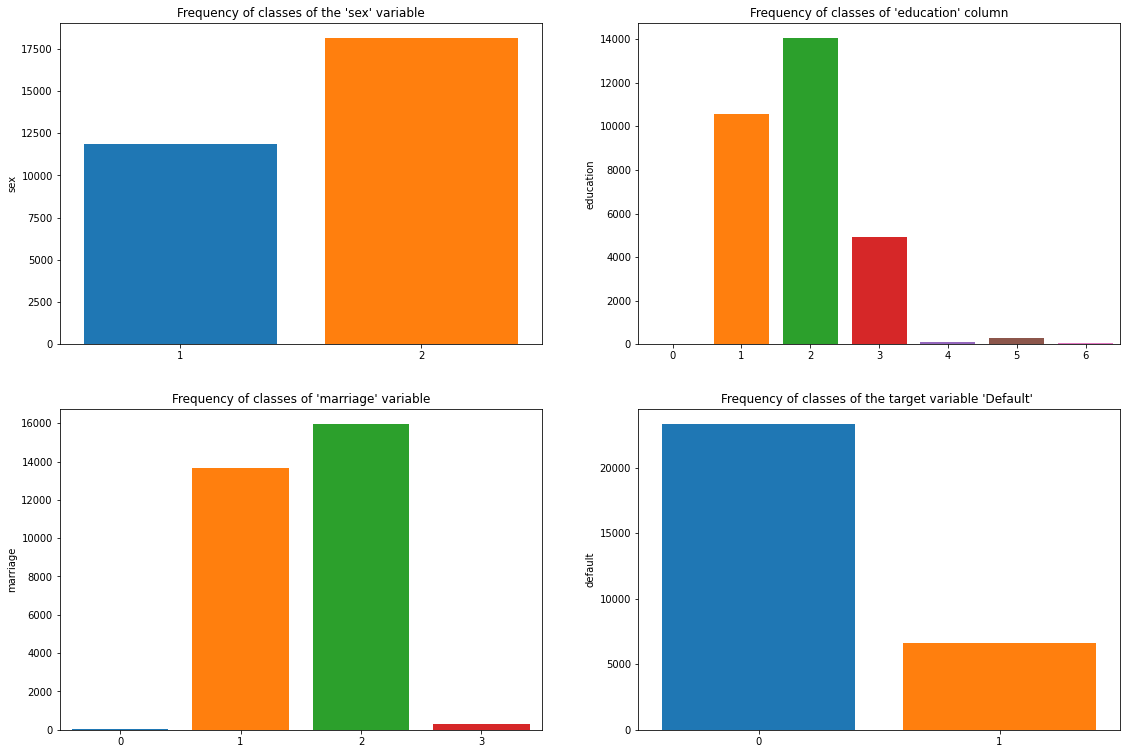

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (19, 13))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = df["sex"].value_counts().index,
            y = df["sex"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the 'sex' variable");

sns.barplot(ax = axes[1],
            x = df["education"].value_counts().index,
            y = df["education"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of 'education' column");

sns.barplot(ax = axes[2],
            x = df["marriage"].value_counts().index,
            y = df["marriage"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of 'marriage' variable");

sns.barplot(ax = axes[3],
            x = df["default"].value_counts().index,
            y = df["default"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the target variable 'Default' ");

<a id="5.4"></a>

#### <b>5.4 <span style='color:#422e13'>|</span> Catplot</b>

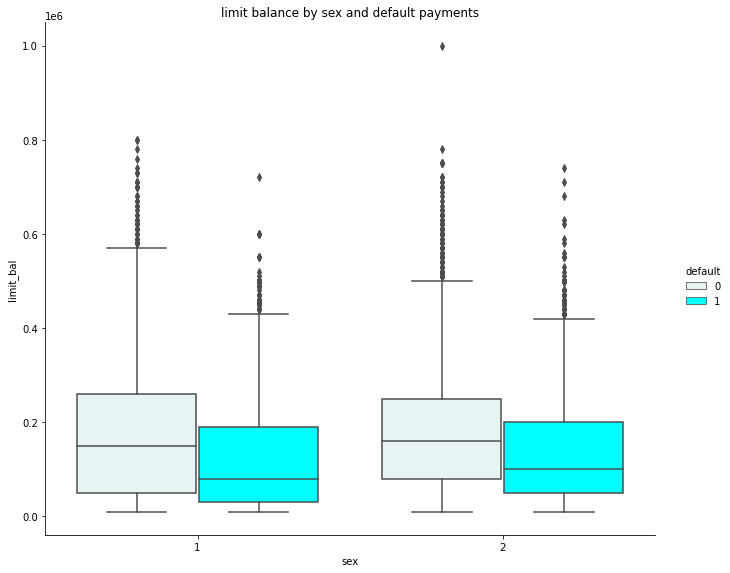

In [12]:
sns.catplot(x = "sex",
            y = "limit_bal",
            kind = "box",
            hue = "default",
            color = '#00FFFF',
            data = df, saturation = 1, height = 8, aspect = 1.2,
            margin_titles = True).set(title = "limit balance by sex and default payments");

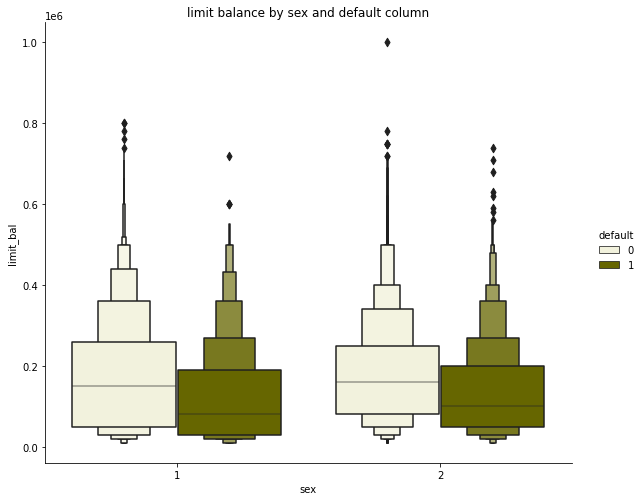

In [13]:
sns.catplot(x = "sex",
            y = "limit_bal",
            hue = "default",
            kind = "boxen",
            color = '#666600',
            data = df, saturation = 1, height = 7, aspect = 1.2,
            margin_titles = True).set(title = "limit balance by sex and default column");

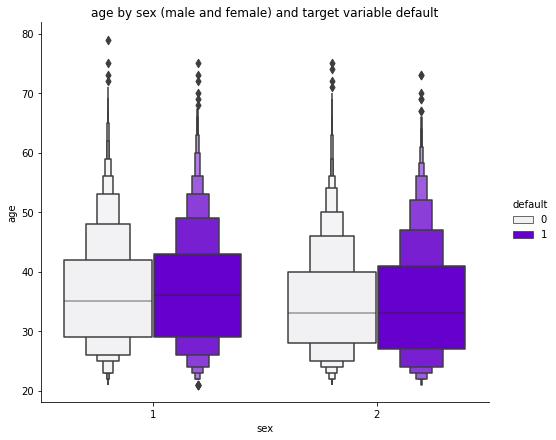

In [14]:
sns.catplot(x = "sex",
            y = "age",
            hue = "default",
            kind = "boxen",
            color = '#6600CC',
            data = df, saturation = 1, height = 6, aspect = 1.2,
            margin_titles = True).set(title = "age by sex (male and female) and target variable default");

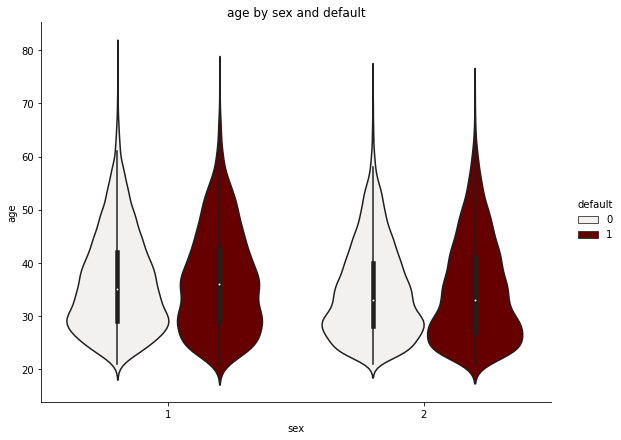

In [15]:
sns.catplot(x = "sex",
            y = "age",
            hue = "default",
            kind = "violin",
            color = '#660000',
            data = df, saturation = 1, height = 6, aspect = 1.35,
            margin_titles = True).set(title = "age by sex and default");

<a id="5.5"></a>

#### <b>5.5 <span style='color:#422e13'>|</span> Pairplot</b>

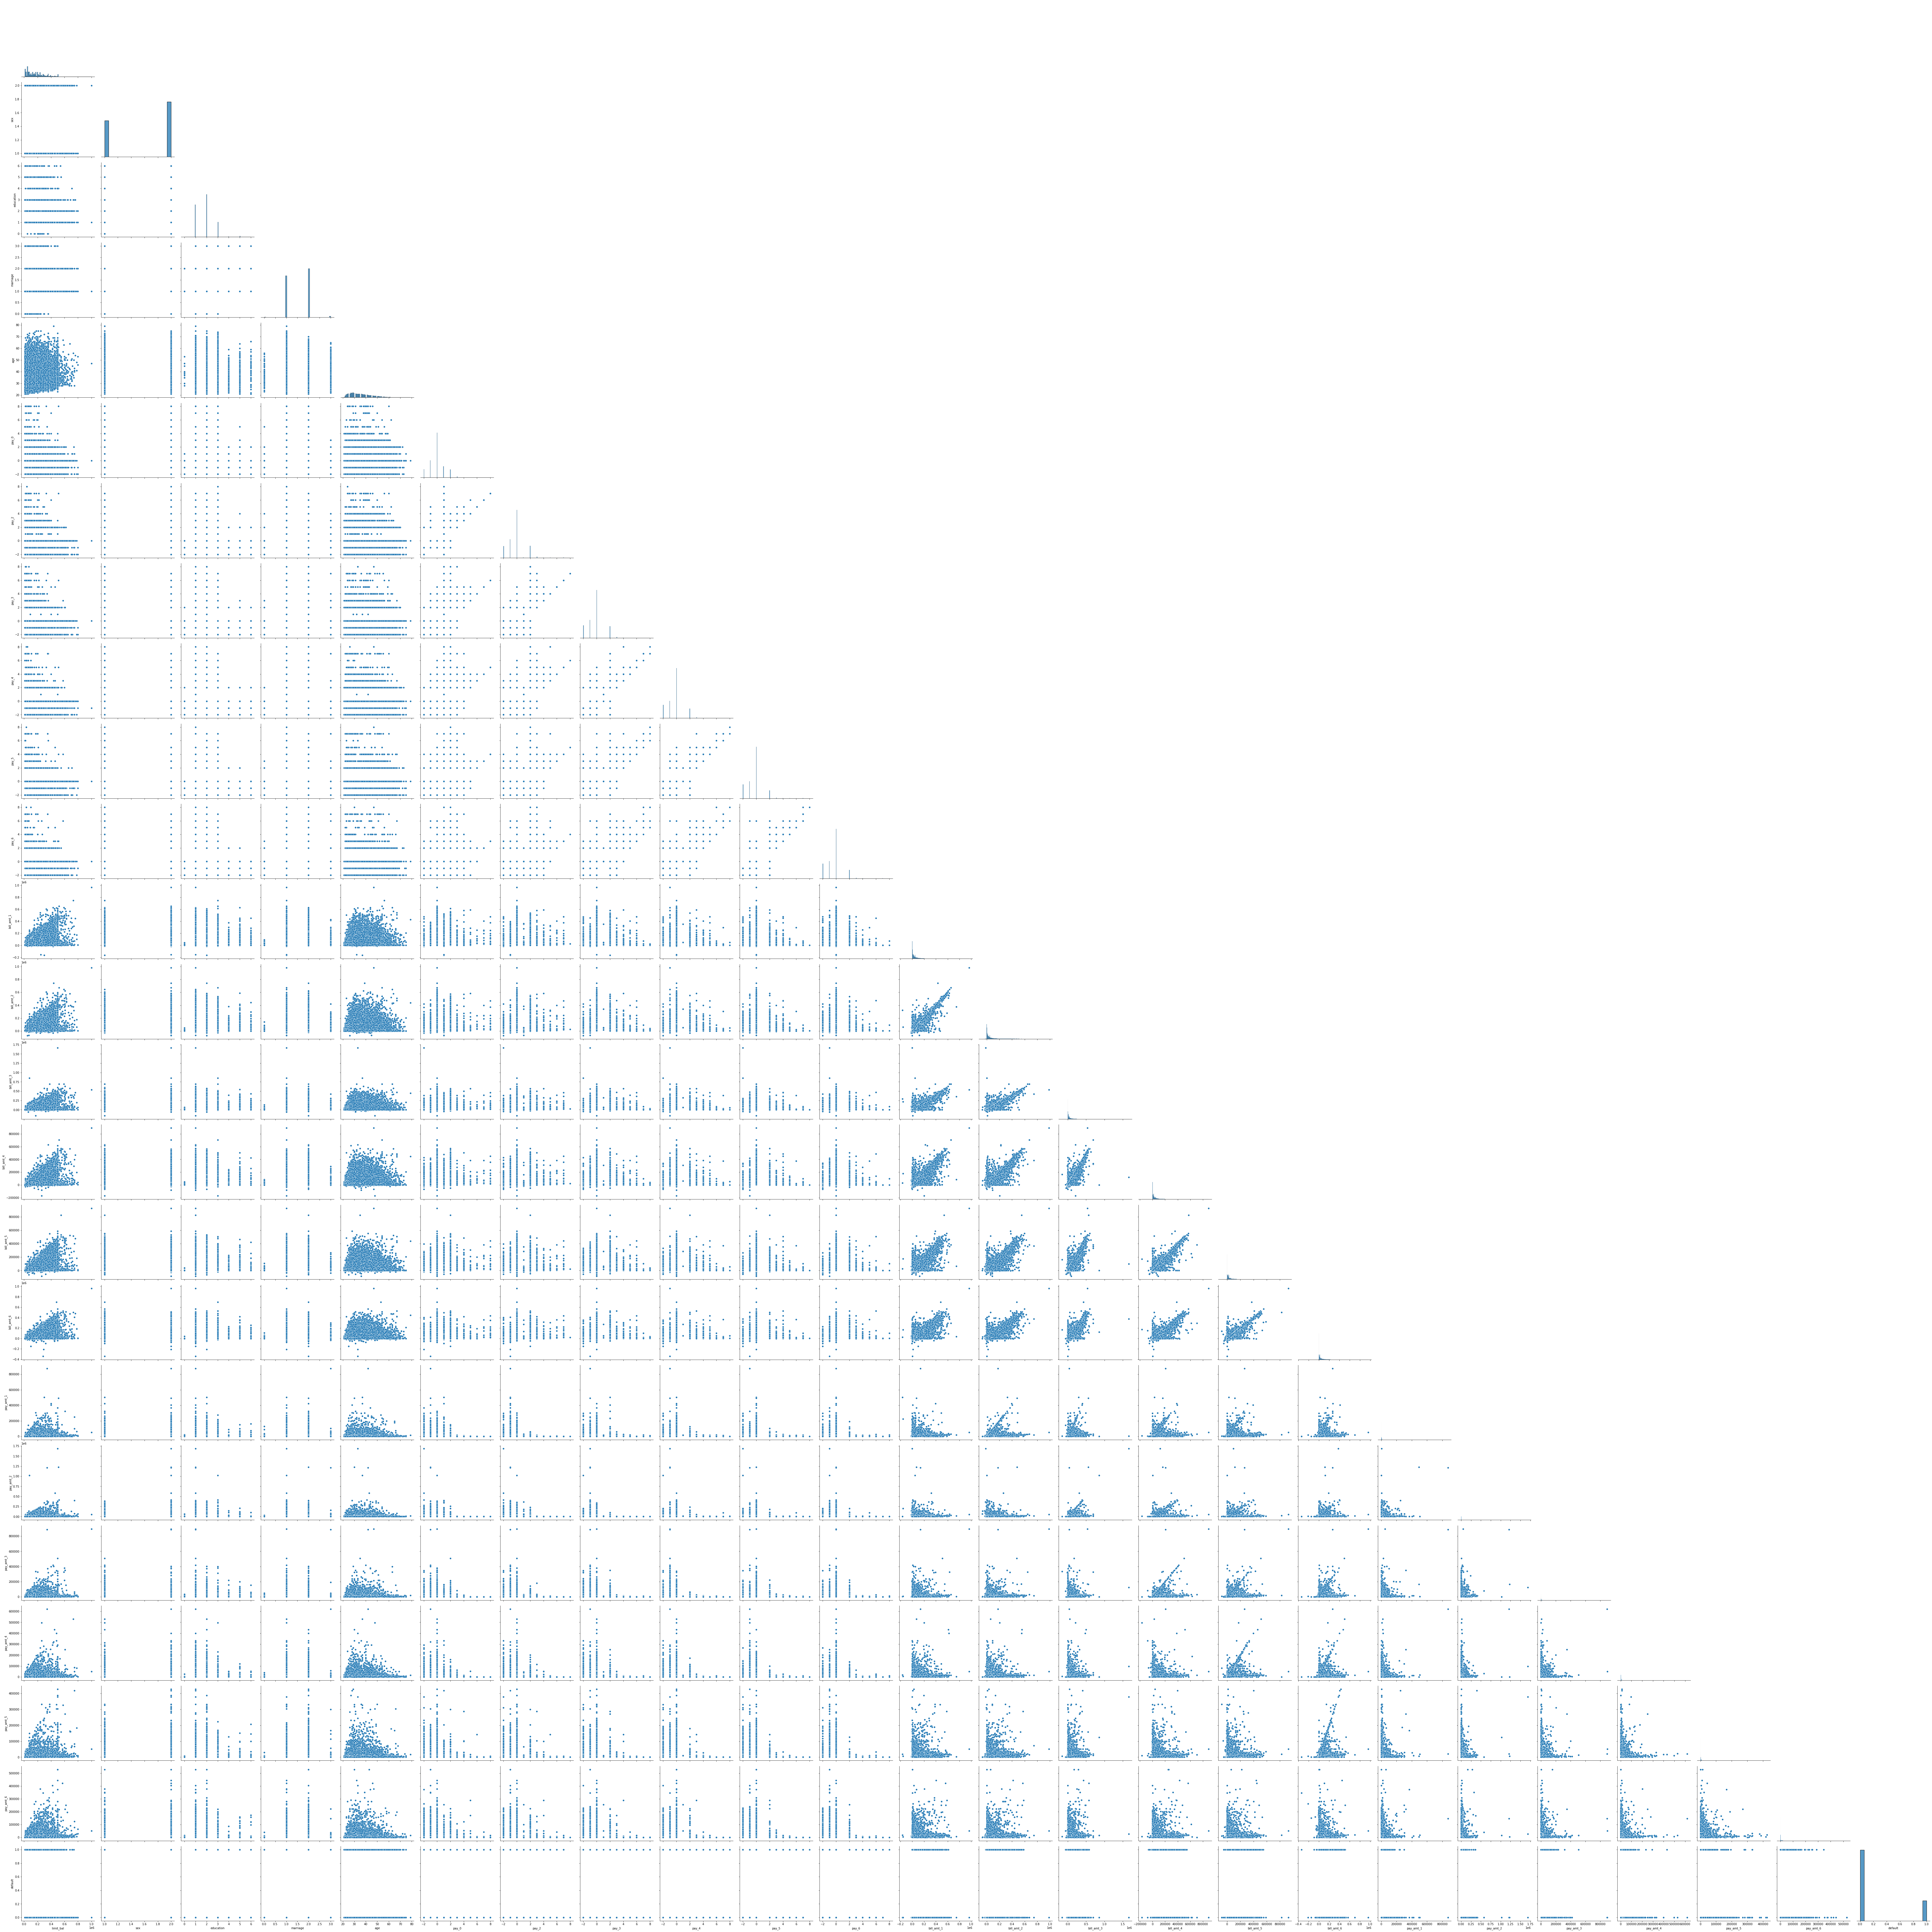

In [16]:
sns.pairplot(df, diag_kind = "hist", height = 4, aspect = 1, corner = True);

<a id="5.6"></a>

#### <b>5.6 <span style='color:#422e13'>|</span> Scatterplot</b>

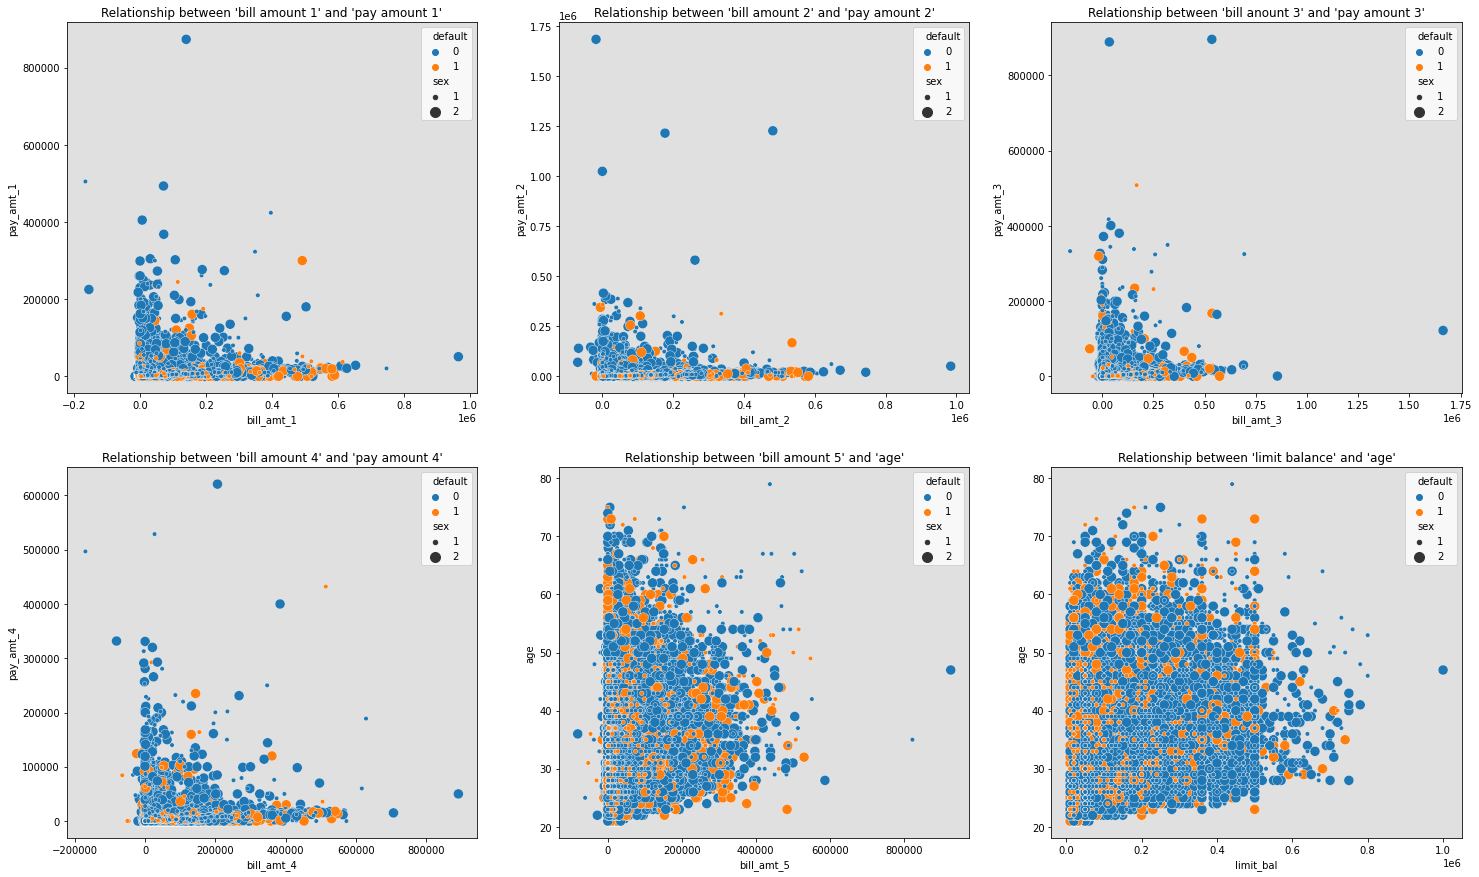

In [17]:
fig, axes = plt.subplots(2, 3, figsize = (25, 15))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "bill_amt_1", y = "pay_amt_1", hue = "default", size = "sex", sizes = (20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 1' and 'pay amount 1'");
axes[0].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[1], x = "bill_amt_2", y = "pay_amt_2", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 2' and 'pay amount 2'");
axes[1].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[2], x = "bill_amt_3", y = "pay_amt_3", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill anount 3' and 'pay amount 3'");
axes[2].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[3], x = "bill_amt_4", y = "pay_amt_4", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 4' and 'pay amount 4'");
axes[3].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[4], x = "bill_amt_5", y = "age", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 5' and 'age'");
axes[4].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[5], x = "limit_bal", y = "age", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'limit balance' and 'age'");
axes[5].set_facecolor("#E0E0E0")

<a id="5.7"></a>

#### <b>5.7 <span style='color:#422e13'>|</span> Distplot</b>

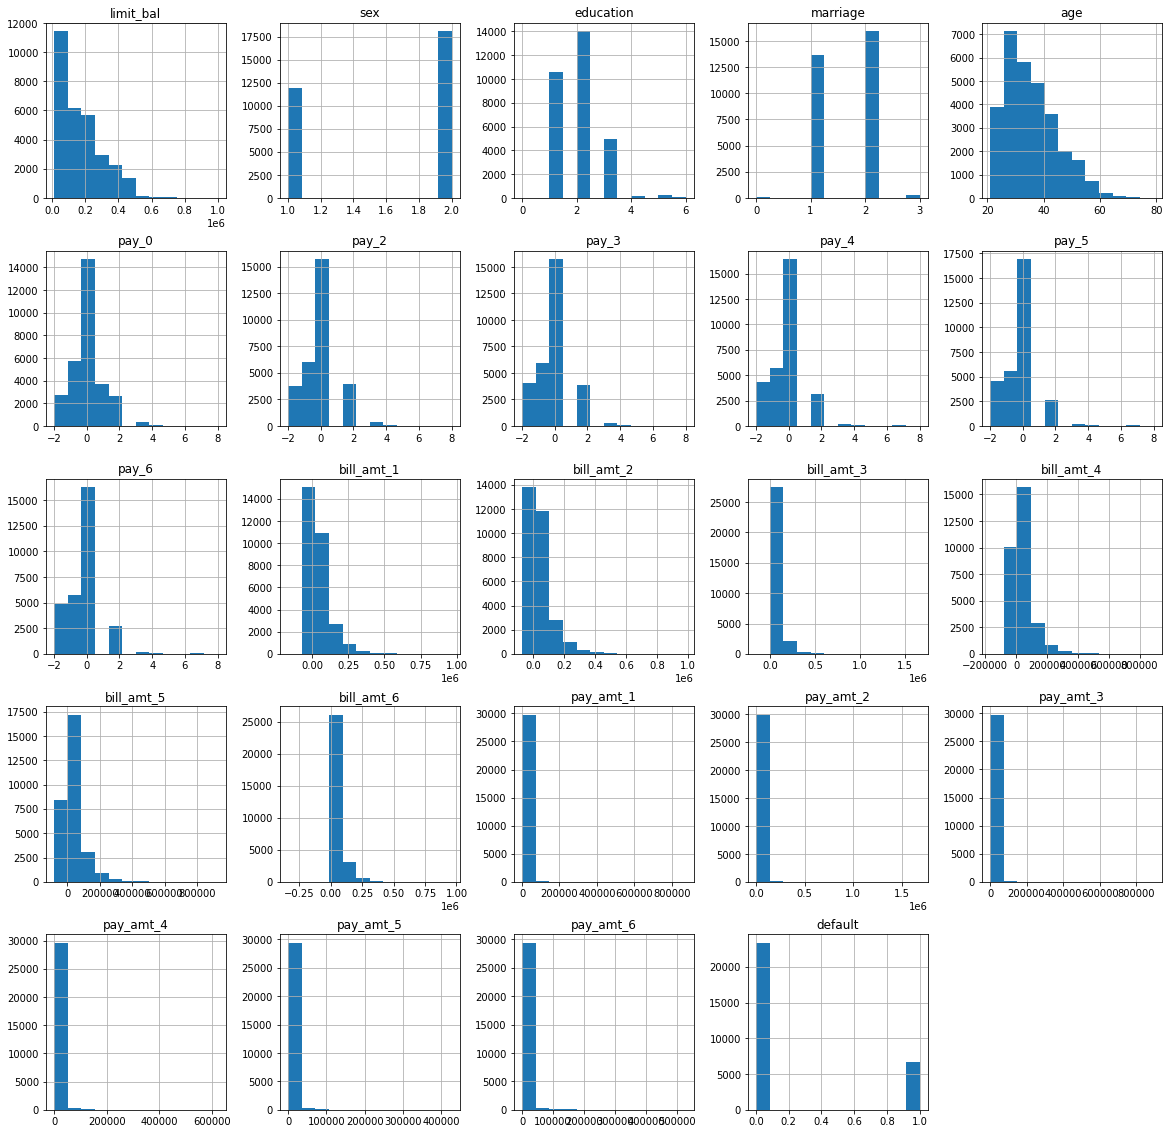

In [18]:
df.hist(figsize = (20, 20), bins = 12, legend = False, grid = True);

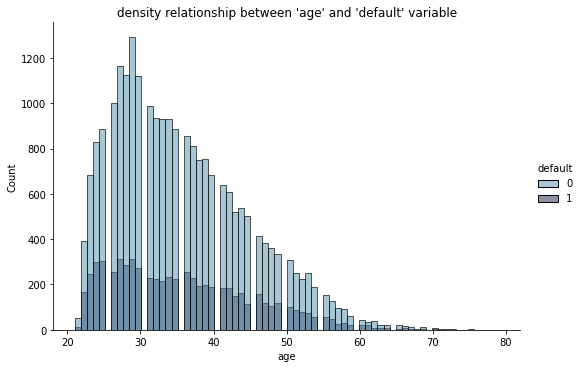

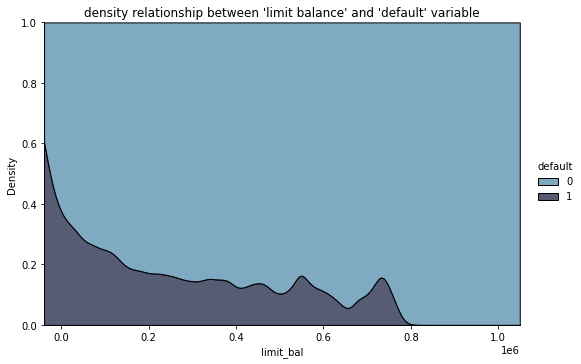

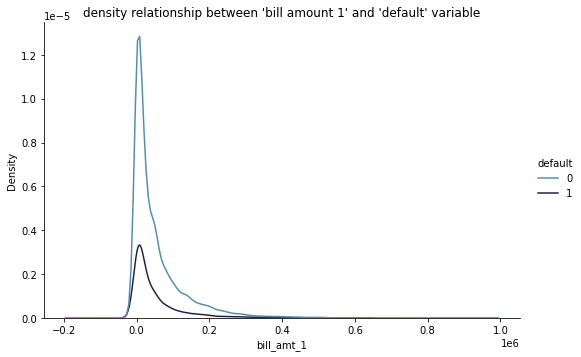

In [19]:
sns.displot(data = df, x = "age", hue = "default", kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "density relationship between 'age' and 'default' variable");

sns.displot(data = df, x = "limit_bal", hue = "default", kind = "kde", height = 5, aspect = 1.5, multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'limit balance' and 'default' variable");

sns.displot(data = df, x = "bill_amt_1", hue = "default", kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'bill amount 1' and 'default' variable");

<a id="5.8"></a>

#### <b>5.8 <span style='color:#422e13'>|</span> Regplot</b>

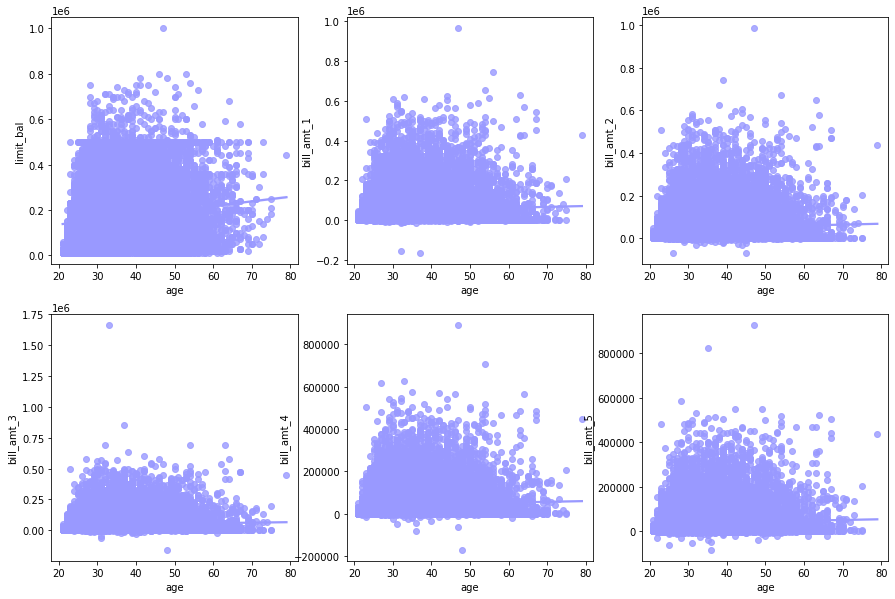

In [20]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "age", y = "limit_bal", data = df, color = "#9999FF");
sns.regplot(ax = axes[1], x = "age", y = "bill_amt_1", data = df, color = "#9999FF");
sns.regplot(ax = axes[2], x = "age", y = "bill_amt_2", data = df, color = "#9999FF");
sns.regplot(ax = axes[3], x = "age", y = "bill_amt_3", data = df, color = "#9999FF");
sns.regplot(ax = axes[4], x = "age", y = "bill_amt_4", data = df, color = "#9999FF");
sns.regplot(ax = axes[5], x = "age", y = "bill_amt_5", data = df, color = "#9999FF");

<a id="6.1"></a>

#### <b>6.1 <span style='color:#422e13'>|</span>Load plot_confusion_matrix function</b>

In [21]:
def plot_confusion_matrix(y_test, y_pred):
    rec = round(recall_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, linewidths = 2, cbar = True, linecolor = "white", fmt = ".0f")
    plt.xlabel("predictions")
    plt.ylabel("original_y")
    plt.title("Recall Score: {0}".format(rec), size = 12)
    plt.show()

<a id="6.2"></a>

#### <b>6.2 <span style='color:#422e13'>|</span>Load scoring function</b>

In [22]:
def scoring(model, x_train, y_train, x_test, y_test):

    y_prob = model.predict_proba(x_test)[:, 1]
    y_pred = model.predict(x_test)

    plot_confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    all_scores = {"Accuracy score" : accuracy_score(y_test, y_pred),
                  "Precision score" : (cm[0, 0]) / (cm[0, 1] + cm[0, 0]),
                  "Recall score" : recall_score(y_test, y_pred),
                  "F1 score" : f1_score(y_test, y_pred),
                  "ROC AUC score" : roc_auc_score(y_test, y_prob)}
    print(all_scores)
    return all_scores

<a id="6.3"></a>

#### <b>6.3 <span style='color:#422e13'>|</span>Load pca_plot function</b>

In [23]:
def pca_plot(x, y):
    pca = PCA(n_components = 2)
    pca_fit = pca.fit_transform(x)
    counter = Counter(y)
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(pca_fit[row_ix, 0], pca_fit[row_ix, 1], label = str(label))
    pyplot.legend()
    pyplot.show()

<a id="6.4"></a>

#### <b>6.4 <span style='#422e13'>|</span>Look at dataset again</b>

In [24]:
df.head(n = 5).style.set_properties(**{"background-color": "#9999FF", "font-size" : "15px",
                                        "color": "#FFFFFF", "border": "1.5px solid black"})

<a id="6.5"></a>

#### <b>6.5 <span style='color:#422e13'>|</span> Encode categoric variables</b>

In [25]:
lbe = LabelEncoder()
lbe.fit_transform(df["sex"])
df["sex"] = lbe.fit_transform(df["sex"])

lbe.fit_transform(df["marriage"])
df["marriage"] = lbe.fit_transform(df["marriage"])

#lbe.fit_transform(df["oral"])
#df["oral"] = lbe.fit_transform(df["oral"])

<a id="6.6"></a>

#### <b>6.6 <span style='color:#422e13'>|</span>Select dependent and independent variables</b>

In [26]:
# independent variable (estimator)
X = df.drop("default", axis = 1)

# dependent variable (label)
y = df["default"]

<a id="6.7"></a>

#### <b>6.7 <span style='color:#422e13'>|</span> Split the dataset into train and test sets</b>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 11)

<a id="6.8"></a>

#### <b>6.8 <span style='color:#422e13'>|</span> Standardization process</b>

<mark><b>Standardizing</b></mark> the features around the center and <mark><b>0 with a standard deviation of 1</b></mark> is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais. For example, <mark><b>a variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1.</b></mark> Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

In [28]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)

<a id="7"></a>

## <b>7 <span style='color:#422e13'>|</span> OVERSAMPLING METHODS</b>

<a id="7.1"></a>

#### <b>7.1 <span style='color:#422e13'>|</span> Logistic regression model without oversampling</b>

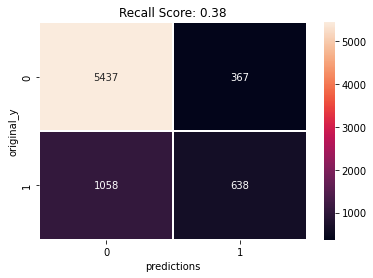

{'Accuracy score': 0.81, 'Precision score': 0.9367677463818056, 'Recall score': 0.3761792452830189, 'F1 score': 0.47241762310255464, 'ROC AUC score': 0.7703095234418683}


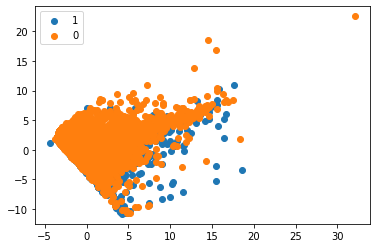

In [29]:
logistic_m = XGBClassifier()
logistic_m.fit(X_train, y_train)
scores = scoring(logistic_m, X_train, y_train, X_test, y_test)
pca_plot(X_train, y_train)

<a id="7.2"></a>

#### <b>7.2 <span style='color:#422e13'>|</span> Random oversampling</b>

### <mark>Random resampling imbalanced datasets</mark>

Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution. This is a simple and effective strategy for imbalanced classification problems. Applying re-sampling strategies to obtain a more balanced data distribution is an effective solution to the imbalance problem

The simplest strategy is to choose examples for the transformed dataset randomly, called random resampling. There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

* Random Oversampling: Randomly duplicate examples in the minority class.
* Random Undersampling: Randomly delete examples in the majority class.

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset. In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached.

* Both approaches can be repeated until the desired class distribution is achieved in the training dataset, such as an equal split across the classes.
* They are referred to as “naive resampling” methods because they assume nothing about the data and no heuristics are used. This makes them simple to implement and fast to execute, which is desirable for very large and complex datasets.
* Both techniques can be used for two-class (binary) classification problems and multi-class classification problems with one or more majority or minority classes.

Importantly, the change to the class distribution is only applied to the training dataset. The intent is to influence the fit of the models. <mark>The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.</mark>

![](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_003.png)

### Reference: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

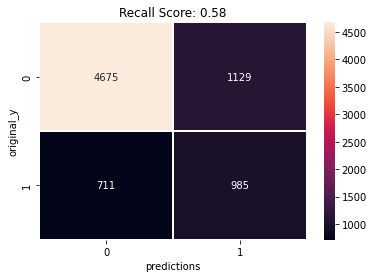

{'Accuracy score': 0.7546666666666667, 'Precision score': 0.8054789800137836, 'Recall score': 0.5807783018867925, 'F1 score': 0.5170603674540682, 'ROC AUC score': 0.7573100915276387}


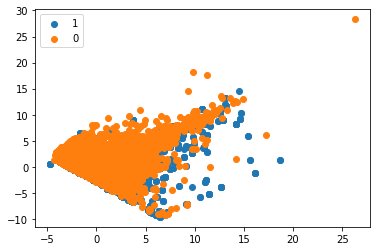

In [30]:
ovs = RandomOverSampler(sampling_strategy = "auto", random_state = 11)
X_rovs, y_rovs = ovs.fit_resample(X_train, y_train)

logistic_m.fit(X_rovs, y_rovs)
rovs_scores = scoring(logistic_m, X_rovs, y_rovs, X_test, y_test)
pca_plot(X_rovs, y_rovs)

<a id="7.3"></a>

#### <b>7.3 <span style='color:#422e13'>|</span> SMOTE oversampling</b>

### <mark>Synthetic Minority Oversampling Technique</mark>

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model. An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective. Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling Technique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution. The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class. A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

#### Reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

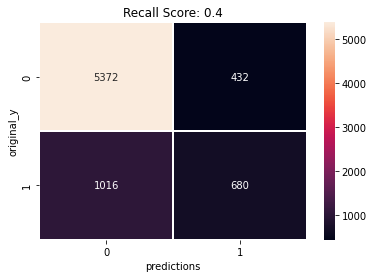

{'Accuracy score': 0.8069333333333333, 'Precision score': 0.9255685733976567, 'Recall score': 0.4009433962264151, 'F1 score': 0.48433048433048437, 'ROC AUC score': 0.7618597047579418}


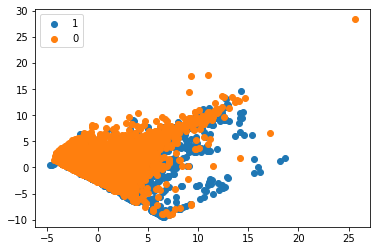

In [31]:
smovs = SMOTE(sampling_strategy = "auto", random_state = 11, k_neighbors = 7, n_jobs = -1)
X_smote, y_smote = smovs.fit_resample(X_train, y_train)

logistic_m.fit(X_smote, y_smote)
smovs_scores = scoring(logistic_m, X_smote, y_smote, X_test, y_test)
pca_plot(X_smote, y_smote)

<a id="7.4"></a>

#### <b>7.4 <span style='color:#422e13'>|</span> Borderline SMOTE oversampling</b>

#### <mark>This algorithm is a variant of the original SMOTE algorithm. Borderline samples will be detected and used to generate new synthetic samples.</mark>

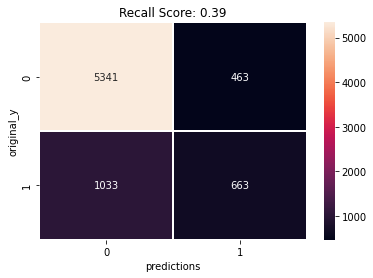

{'Accuracy score': 0.8005333333333333, 'Precision score': 0.9202274293590628, 'Recall score': 0.3909198113207547, 'F1 score': 0.46987951807228917, 'ROC AUC score': 0.756523589375577}


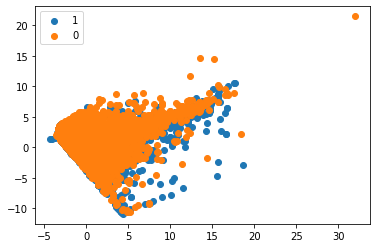

In [32]:
border_smovs = BorderlineSMOTE()
X_border, y_border = border_smovs.fit_resample(X_train, y_train)

logistic_m.fit(X_border, y_border)
border_smovs_scores = scoring(logistic_m, X_border, y_border, X_test, y_test)
pca_plot(X_border, y_border)

<a id="7.5"></a>

#### <b>7.5 <span style='color:#422e13'>|</span> Borderline SMOTE SVM </b>

### <mark>Borderline-SMOTE SVM</mark>

**Synthetic data will be randomly created along the lines joining each minority class support vector with a number of its nearest neighbors. What special about Borderline-SMOTE SVM compared to the Borderline-SMOTE is that more data are synthesized away from the region of class overlap.**

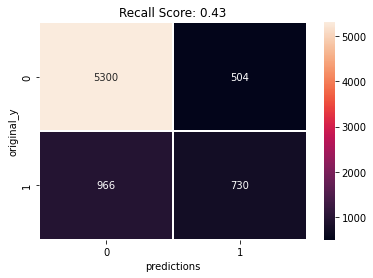

{'Accuracy score': 0.804, 'Precision score': 0.9131633356305996, 'Recall score': 0.43042452830188677, 'F1 score': 0.49829351535836175, 'ROC AUC score': 0.7615886652666345}


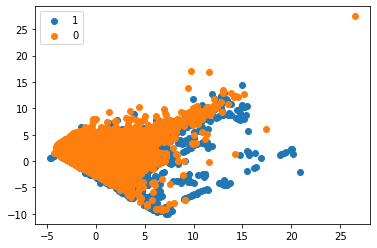

In [33]:
b_svm = SVMSMOTE()
X_svm, y_svm = b_svm.fit_resample(X_train, y_train)

logistic_m.fit(X_svm, y_svm)
b_svm_scores = scoring(logistic_m, X_svm, y_svm, X_test, y_test)
pca_plot(X_svm, y_svm)

<a id="7.6"></a>

#### <b>7.6 <span style='color:#422e13'>|</span> Adaptive synthetic sampling </b>

### <mark>Adaptive synthetic sampling (ADASYN)</mark>

The essential idea of ADASYN is to use a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn compared to those minority examples that are easier to learn. As a result, the ADASYN approach improves learning with respect to the data distributions in two ways: reducing the bias introduced by the class imbalance, and adaptively shifting the classification decision boundary toward the difficult examples. Simulation analyses on several machine learning data sets show the effectiveness of this method across five evaluation metrics.

![](https://d3i71xaburhd42.cloudfront.net/48234756b7cf798bfeb47328f7c5d597fd4838c2/3-Figure1-1.png)

#### Reference: https://ieeexplore.ieee.org/document/4633969

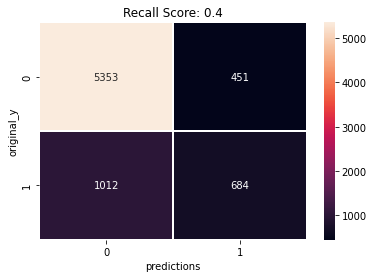

{'Accuracy score': 0.8049333333333333, 'Precision score': 0.9222949689869056, 'Recall score': 0.4033018867924528, 'F1 score': 0.4832214765100671, 'ROC AUC score': 0.7550758951211266}


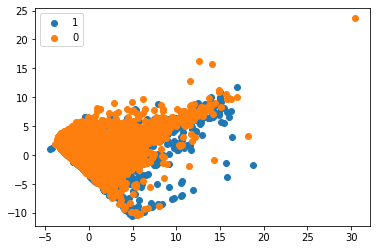

In [34]:
ada_samp = ADASYN()
X_ada, y_ada = ada_samp.fit_resample(X_train, y_train)

logistic_m.fit(X_ada, y_ada)
ada_samp_scores = scoring(logistic_m, X_ada, y_ada, X_test, y_test)
pca_plot(X_ada, y_ada)

<a id="7.7"></a>

#### <b>7.7 <span style='color:#422e13'>|</span> Compare all results in a table </b>

In [35]:
scores_dataframe = pd.DataFrame(data = [scores.values(), rovs_scores.values(),
                                 smovs_scores.values(), border_smovs_scores.values(),
                                 b_svm_scores.values(), ada_samp_scores.values()], 
                                index = ["normal", "random","smote","border","svm","ada"],
                                columns = scores.keys())

scores_dataframe.style.set_properties(**{"background-color": "#CC99FF", "font-size" : "15px",
                                        "color": "#FFFFFF", "border": "1.5px solid black"})

<a id="7.8"></a>

#### <b>7.8 <span style='color:#422e13'>|</span> Main reference for the notebook </b>

#### <mark>I was inspired and used the kernel I linked below while developing this notebook.</mark>

#### <mark>For this reason, I feel obliged to thank https://www.kaggle.com/eisgandar for sharing such a valuable and useful kernel.</mark>

#### https://www.kaggle.com/code/eisgandar/oversampling-methods-on-unbalanced-datasets

<a id="7.9"></a>

#### <b>7.9 <span style='color:#422e13'>|</span> Author's message </b>

# <h1 style="font-family: Sans-Serif; padding: 19px; font-size: 30px; color: #491D8B; text-align: center; line-height: 1.9;"><b>If <mark><b>you like</b></mark> this kernal, <mark><b> then please vote, share </b></mark> and comment. <mark><b> Thanking <mark><b> you !</b></mark> 😊  </b><br><span style = "color: #CD2DE0; font-size:18px"></span></h1>
<hr>